In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%%writefile /opt/conda/lib/python3.7/site-packages/tensorboard/plugins/scalar/summary_v2.py
# Copyright 2018 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Scalar summaries and TensorFlow operations to create them, V2 versions.

A scalar summary stores a single floating-point value, as a rank-0
tensor.
"""


import numpy as np

from tensorboard.compat import tf2 as tf
from tensorboard.compat.proto import summary_pb2
from tensorboard.plugins.scalar import metadata
from tensorboard.util import tensor_util


def scalar(name, data, step=None, description=None):
    """Write a scalar summary.

    See also `tf.summary.image`, `tf.summary.histogram`, `tf.summary.SummaryWriter`.

    Writes simple numeric values for later analysis in TensorBoard.  Writes go to
    the current default summary writer. Each summary point is associated with an
    integral `step` value. This enables the incremental logging of time series
    data.  A common usage of this API is to log loss during training to produce
    a loss curve.

    For example:

    ```python
    test_summary_writer = tf.summary.create_file_writer('test/logdir')
    with test_summary_writer.as_default():
        tf.summary.scalar('loss', 0.345, step=1)
        tf.summary.scalar('loss', 0.234, step=2)
        tf.summary.scalar('loss', 0.123, step=3)
    ```

    Multiple independent time series may be logged by giving each series a unique
    `name` value.

    See [Get started with TensorBoard](https://www.tensorflow.org/tensorboard/get_started)
    for more examples of effective usage of `tf.summary.scalar`.

    In general, this API expects that data points are logged iwth a monotonically
    increasing step value. Duplicate points for a single step or points logged out
    of order by step are not guaranteed to display as desired in TensorBoard.

    Arguments:
      name: A name for this summary. The summary tag used for TensorBoard will
        be this name prefixed by any active name scopes.
      data: A real numeric scalar value, convertible to a `float32` Tensor.
      step: Explicit `int64`-castable monotonic step value for this summary. If
        omitted, this defaults to `tf.summary.experimental.get_step()`, which must
        not be None.
      description: Optional long-form description for this summary, as a
        constant `str`. Markdown is supported. Defaults to empty.

    Returns:
      True on success, or false if no summary was written because no default
      summary writer was available.

    Raises:
      ValueError: if a default writer exists, but no step was provided and
        `tf.summary.experimental.get_step()` is None.
    """
    summary_metadata = metadata.create_summary_metadata(
        display_name=None, description=description
    )
    # TODO(https://github.com/tensorflow/tensorboard/issues/2109): remove fallback
    summary_scope = (
        getattr(tf.summary.experimental, "summary_scope", None)
        or tf.summary.summary_scope
    )
    with summary_scope(name, "scalar_summary", values=[data, step]) as (tag, _):
#         tf.debugging.assert_scalar(data)
        return tf.summary.write(
            tag=tag,
            tensor=tf.cast(data, tf.float32),
            step=step,
            metadata=summary_metadata,
        )


def scalar_pb(tag, data, description=None):
    """Create a scalar summary_pb2.Summary protobuf.

    Arguments:
      tag: String tag for the summary.
      data: A 0-dimensional `np.array` or a compatible python number type.
      description: Optional long-form description for this summary, as a
        `str`. Markdown is supported. Defaults to empty.

    Raises:
      ValueError: If the type or shape of the data is unsupported.

    Returns:
      A `summary_pb2.Summary` protobuf object.
    """
    arr = np.array(data)
    if arr.shape != ():
        raise ValueError(
            "Expected scalar shape for tensor, got shape: %s." % arr.shape
        )
    if arr.dtype.kind not in ("b", "i", "u", "f"):  # bool, int, uint, float
        raise ValueError("Cast %s to float is not supported" % arr.dtype.name)
    tensor_proto = tensor_util.make_tensor_proto(arr.astype(np.float32))
    summary_metadata = metadata.create_summary_metadata(
        display_name=None, description=description
    )
    summary = summary_pb2.Summary()
    summary.value.add(tag=tag, metadata=summary_metadata, tensor=tensor_proto)
    return summary


Overwriting /opt/conda/lib/python3.7/site-packages/tensorboard/plugins/scalar/summary_v2.py


In [3]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2023-03-22 02:01:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  6.57MB/s    in 2.0s    

2023-03-22 02:01:08 (6.57 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [4]:
!/kaggle/working/ngrok authtoken 2NLZhLfl7iQnEJRVnc3Mq2LtQ60_6c8uAHtUJtoNQSYYRj8zr

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [5]:
import multiprocessing


pool = multiprocessing.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir /kaggle/working/logs/ --host 0.0.0.0 --port 6006 &",
                        "/kaggle/working/ngrok http 6006 &"
                        ]]


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.11.2 at http://0.0.0.0:6006/ (Press CTRL+C to quit)


In [6]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://9bdf-35-236-178-215.ngrok.io


In [7]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers, losses, optimizers
import matplotlib.pyplot as plt
# from transformers import TFConvNextModel, ConvNextConfig, ConvNextImageProcessor, AutoImageProcessor

In [8]:
# tf.keras.mixed_precision.set_global_policy('mixed_float16')


In [9]:
img_dir = "/kaggle/input/breast-cancer-images/SDLjpg1024/"
df = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv")

In [10]:
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [11]:
df.shape

(54706, 14)

In [12]:
df['machine_id'].value_counts()

49     23529
48      8699
29      8267
21      8221
93      1915
216     1908
210     1070
170      923
190      145
197       29
Name: machine_id, dtype: int64

In [13]:
df.groupby(['patient_id', 'laterality'])['difficult_negative_case'].nunique().max()

1

In [14]:
df['implant'].value_counts()

0    53229
1     1477
Name: implant, dtype: int64

In [15]:
df['difficult_negative_case'].value_counts()

False    47001
True      7705
Name: difficult_negative_case, dtype: int64

In [16]:
df['file_path'] = img_dir + df['patient_id'].astype('str') + "/" + df['image_id'].astype('str') + '.jpg'
df['LV'] = df['laterality'] + "-" + df['view']

In [17]:
df1 = pd.pivot_table(df, index='patient_id', columns='LV', values='file_path', aggfunc='first').dropna(axis=1)
df2 = pd.pivot_table(df, index='patient_id', columns="laterality", values='cancer')

In [18]:
df3 = pd.concat([df1, df2], axis=1)
df3['label'] = df3['L'] * 2 + df3['R']

In [19]:
df3 = df3.drop(['L', 'R'], axis=1).reset_index()

In [20]:
df3.head()

,patient_id,L-CC,L-MLO,R-CC,R-MLO,label
0,5,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,0
1,25,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,0
2,28,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,0
3,30,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,0
4,33,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,/kaggle/input/breast-cancer-images/SDLjpg1024/...,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df3 = df3[df3['label'] != 3].sample(frac=0.2)
train_df, val_df = train_test_split(df3, test_size=0.2, stratify=df3['label'])

In [23]:
train_df['label'].value_counts()

0    1834
2      42
1      28
Name: label, dtype: int64

In [24]:
val_df['label'].value_counts()

0    459
2     11
1      7
Name: label, dtype: int64

In [25]:
def oversampling(df, fold):
    pos_df = df[df['label'] != 0]
    neg_df = df[df['label'] == 0]
    new_df = pd.concat([pos_df] * fold + [neg_df], axis=0, ignore_index=True)
    new_df = new_df.sample(frac=1).reset_index(drop=True)
    return new_df

In [26]:
train_df = oversampling(train_df, 20)

In [27]:
train_ds = tf.data.Dataset.from_tensor_slices(dict(train_df)).shuffle(1000)
val_ds = tf.data.Dataset.from_tensor_slices(dict(val_df))

In [28]:
for d in train_ds.take(5):
    print(d)

{'patient_id': <tf.Tensor: shape=(), dtype=int64, numpy=56165>, 'L-CC': <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/breast-cancer-images/SDLjpg1024/56165/2095574606.jpg'>, 'L-MLO': <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/breast-cancer-images/SDLjpg1024/56165/163503005.jpg'>, 'R-CC': <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/breast-cancer-images/SDLjpg1024/56165/1602076183.jpg'>, 'R-MLO': <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/breast-cancer-images/SDLjpg1024/56165/348880460.jpg'>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>}
{'patient_id': <tf.Tensor: shape=(), dtype=int64, numpy=20251>, 'L-CC': <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/breast-cancer-images/SDLjpg1024/20251/1616755366.jpg'>, 'L-MLO': <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/breast-cancer-images/SDLjpg1024/20251/1189991461.jpg'>, 'R-CC': <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/breast-cancer-image

In [29]:
img_size = 256
def map_to_img(ds):
    p1 = ds['L-CC']
    p2 = ds['L-MLO']
    p3 = ds['R-CC']
    p4 = ds['R-MLO']
    img1 = tf.io.read_file(p1)
    img1 = tf.io.decode_jpeg(img1, channels=1)
    img1 = tf.image.resize(img1, (img_size, img_size), antialias=True)
    img2 = tf.io.read_file(p2)
    img2 = tf.io.decode_jpeg(img2, channels=1)
    img2 = tf.image.resize(img2, (img_size, img_size), antialias=True)
    img3 = tf.io.read_file(p3)
    img3 = tf.io.decode_jpeg(img3, channels=1)
    img3 = tf.image.resize(img3, (img_size, img_size), antialias=True)
    img4 = tf.io.read_file(p4)
    img4 = tf.io.decode_jpeg(img4, channels=1)
    img4 = tf.image.resize(img4, (img_size, img_size), antialias=True)
    # imgL = tf.concat([img1, img2], axis=1)
    # imgR = tf.concat([img3, img4], axis=1)
    # img_arr = tf.concat([imgL, imgR], axis=0)
    return [img1, img2, img3, img4], tf.one_hot(ds['label'], depth=3)

In [30]:
train_ds = train_ds.map(map_to_img)
val_ds = val_ds.map(map_to_img)

In [31]:
for img, label in train_ds.take(5):
    print(img.shape)
    print(label)

(4, 256, 256, 1)
tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
(4, 256, 256, 1)
tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
(4, 256, 256, 1)
tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
(4, 256, 256, 1)
tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
(4, 256, 256, 1)
tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)


In [32]:
# image_processor = AutoImageProcessor.from_pretrained("facebook/convnext-tiny-224")
# model = TFConvNextModel.from_pretrained("facebook/convnext-tiny-224")

In [33]:
# image_processor(img, data_format='channels_last')

In [34]:
# config = ConvNextConfig(num_channels=1, image_size = img_size)
# model = TFConvNextModel(config).from_pretrained("facebook/convnext-tiny-224")

In [35]:
# model(img[0])

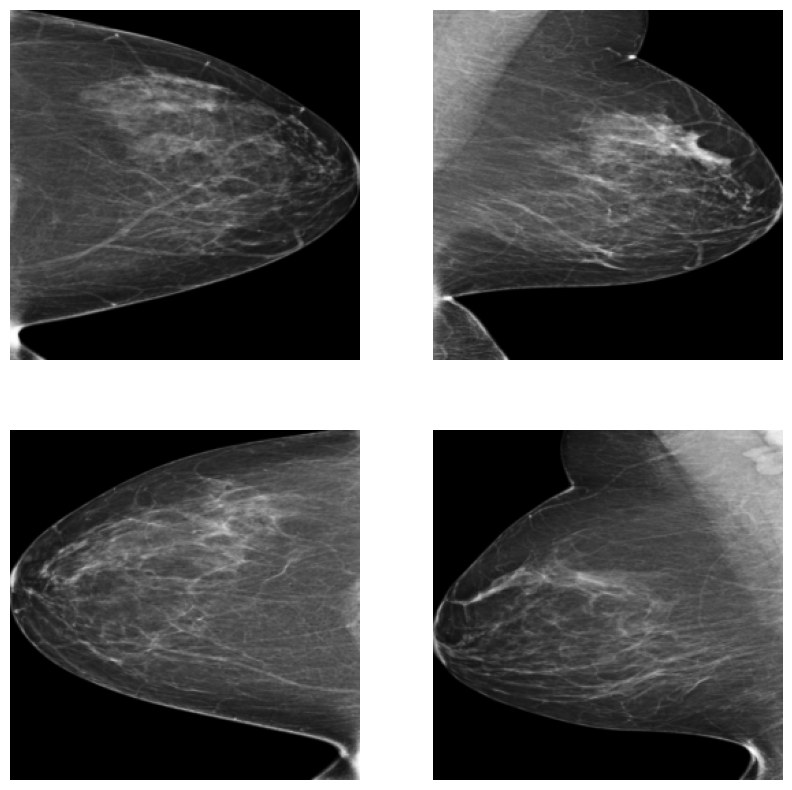

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img[0], cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(img[1], cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(img[2], cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(img[3], cmap='gray')
plt.axis('off')
plt.show()

In [37]:
batch_size = 16
train_ds = train_ds.batch(batch_size).prefetch(batch_size)
val_ds = val_ds.batch(batch_size).prefetch(batch_size)

In [38]:
from tensorflow.keras.applications import ConvNeXtTiny, EfficientNetB0

In [39]:
# class LayerScale(layers.Layer):
#     """Taken from:
#     https://github.com/keras-team/keras/blob/v2.10.0/keras/applications/convnext.py

#     Layer scale module.
#     References:
#       - https://arxiv.org/abs/2103.17239
#     Args:
#       init_values (float): Initial value for layer scale. Should be within
#         [0, 1].
#       projection_dim (int): Projection dimensionality.
#     Returns:
#       Tensor multiplied to the scale.
#     """

#     def __init__(self, init_values, projection_dim, **kwargs):
#         super().__init__(**kwargs)
#         self.init_values = init_values
#         self.projection_dim = projection_dim

#     def build(self, input_shape):
#         self.gamma = tf.Variable(
#             self.init_values * tf.ones((self.projection_dim,), dtype=tf.float16), 
#             dtype=tf.float16
#     )

#     def call(self, x):
#         return x * self.gamma

#     def get_config(self):
#         config = super().get_config()
#         config.update(
#             {
#                 "init_values": self.init_values,
#                 "projection_dim": self.projection_dim,
#             }
#         )
#         return config

In [40]:

img_augmentation = tf.keras.models.Sequential([
    layers.RandomRotation(factor=0.15),
    layers.RandomFlip(),
    layers.RandomZoom(0.1)
],
name='img_augmentation')


def build_model():
    pretrained_model = EfficientNetB0(include_top=False, weights='imagenet')
    pretrained_model.trainable = True

    inputs = layers.Input(shape=(4, img_size, img_size, 1), dtype=tf.float16)
    x1, x2, x3, x4 = tf.unstack(inputs, axis=1)
    x1 = img_augmentation(x1)
    x2 = img_augmentation(x2)
    x3 = img_augmentation(x3)
    x4 = img_augmentation(x4)
    xL = tf.concat([x1, x2], axis=2)
    xR = tf.concat([x3, x4], axis=2)
    x = tf.concat([xL, xR], axis=1)
    x = tf.concat([x, x, x], axis=-1)
    x = pretrained_model(x)
    x = layers.AveragePooling2D(8)(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
#     x = layers.Dense(64, activation='relu')(x)
#     x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(3)(x)
    outputs = layers.Activation('softmax', dtype='float32')(outputs)
    model = tf.keras.Model(inputs, outputs)

    return model

In [41]:
# tf.keras.backend.clear_session()
model = build_model()

16705208/16705208 [==============================] - 1s 0us/step


In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 4, 256, 256  0           []                               
                                , 1)]                                                             
                                                                                                  
 tf.unstack (TFOpLambda)        [(None, 256, 256, 1  0           ['input_2[0][0]']                
                                ),                                                                
                                 (None, 256, 256, 1                                               
                                ),                                                                
                                 (None, 256, 256, 1                                           

In [43]:
# model.load_weights("savedweights02.h")
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4),
    metrics = [
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Accuracy(),
        tf.keras.metrics.AUC(),
        tfa.metrics.F1Score(num_classes=3, threshold=0.5)
    ]
)

In [44]:
import time
root_logdir = os.path.join("/kaggle/working", "logs")

def get_run_logdir():
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboad_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [45]:
r = model.fit(
    train_ds,
    epochs=5,
    validation_data = val_ds,
    callbacks = [tensorboad_cb]
)

Epoch 1/5


2023-03-22 02:03:40.211111: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


203/203 [==============================] - 247s 906ms/step - loss: 0.5948 - recall: 0.6886 - precision: 0.7864 - accuracy: 0.0000e+00 - auc: 0.9039 - f1_score: 0.6888 - val_loss: 0.2340 - val_recall: 0.9350 - val_precision: 0.9429 - val_accuracy: 0.0000e+00 - val_auc: 0.9818 - val_f1_score: 0.3546
Epoch 2/5
 80/203 [==========>...................] - ETA: 1:38 - loss: 0.1857 - recall: 0.9266 - precision: 0.9368 - accuracy: 0.0000e+00 - auc: 0.9911 - f1_score: 0.9295

W0322 02:09:10.123319 139638035441408 security_validator.py:46] In 3.0, this warning will become an error:
Illegal Content-Security-Policy for script-src: 'unsafe-inline'
Illegal Content-Security-Policy for script-src-elem: 'unsafe-inline'


203/203 [==============================] - 172s 847ms/step - loss: 0.1407 - recall: 0.9465 - precision: 0.9527 - accuracy: 1.0307e-04 - auc: 0.9947 - f1_score: 0.9467 - val_loss: 0.3186 - val_recall: 0.9245 - val_precision: 0.9284 - val_accuracy: 0.0000e+00 - val_auc: 0.9719 - val_f1_score: 0.3466
Epoch 3/5
203/203 [==============================] - 182s 896ms/step - loss: 0.0514 - recall: 0.9824 - precision: 0.9836 - accuracy: 0.0030 - auc: 0.9994 - f1_score: 0.9820 - val_loss: 0.3531 - val_recall: 0.9308 - val_precision: 0.9328 - val_accuracy: 0.0000e+00 - val_auc: 0.9689 - val_f1_score: 0.3221
Epoch 4/5
203/203 [==============================] - 173s 852ms/step - loss: 0.0529 - recall: 0.9833 - precision: 0.9842 - accuracy: 0.0042 - auc: 0.9989 - f1_score: 0.9829 - val_loss: 0.3182 - val_recall: 0.9581 - val_precision: 0.9641 - val_accuracy: 0.0014 - val_auc: 0.9784 - val_f1_score: 0.3265
Epoch 5/5
203/203 [==============================] - 173s 851ms/step - loss: 0.0270 - recall: 0

In [46]:
model.save_weights("/kaggle/working/savedweights03.h")

In [47]:
probs = model.predict(val_ds)

30/30 [==============================] - 13s 380ms/step


In [48]:
y_pred = probs.argmax(axis=1)

In [49]:
y_pred.shape

(477,)

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

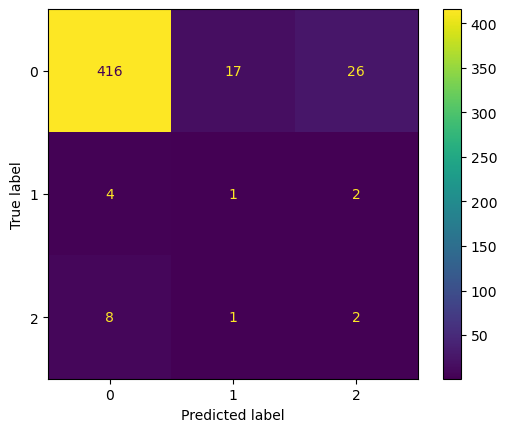

In [51]:
cm = confusion_matrix(val_df['label'], y_pred)
ConfusionMatrixDisplay(cm).plot()

In [71]:
!ps -ef

UID          PID    PPID  C STIME TTY          TIME CMD
root           1       0  0 02:00 ?        00:00:00 /bin/bash -c ENTRYPOINT=jupy
root           9       1  0 02:00 ?        00:00:08 /opt/conda/bin/python3.7 /op
root          23       9 59 02:00 ?        00:25:54 /opt/conda/bin/python3.7 -m 
root          93      23  0 02:01 ?        00:00:00 /opt/conda/bin/python3.7 -m 
root          94      23  0 02:01 ?        00:00:00 /opt/conda/bin/python3.7 -m 
root          95      23  0 02:01 ?        00:00:00 /opt/conda/bin/python3.7 -m 
root          96      23  0 02:01 ?        00:00:00 /opt/conda/bin/python3.7 -m 
root          97      23  0 02:01 ?        00:00:00 /opt/conda/bin/python3.7 -m 
root          98      23  0 02:01 ?        00:00:00 /opt/conda/bin/python3.7 -m 
root          99      23  0 02:01 ?        00:00:00 /opt/conda/bin/python3.7 -m 
root         100      23  0 02:01 ?        00:00:00 /opt/conda/bin/python3.7 -m 
root         101      23  0 02:01 ?        00:00:00 /

In [70]:
# !kill $(ps -ef | grep tensorboard | awk '{print $2}')

In [69]:
!kill $(ps -ef | grep 6006 | awk '{print $2}')